# Airoplane Ticket Price Prediction ( Ridge Regressor )

## 1) Importing packages

In [71]:
import pandas as pd
import calendar
import re
import datetime
import calendar
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

## 2) Reading Dataset

In [72]:
read_data = pd.read_csv('DataSet.csv')
read_data.tail()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10664,IndiGo,9/04/2019,Banglore,Delhi,18:55,21:50,2h 55m,0,No info,4823
10665,IndiGo,27/04/2019,Kolkata,Banglore,15:15,17:45,2h 30m,0,No info,4804
10666,Jet Airways,12/06/2019,Delhi,Cochin,18:15,19:00 13 Jun,24h 45m,1,In-flight meal not included,10262
10667,Multiple carriers,15/06/2019,Delhi,Cochin,04:55,19:15,14h 20m,1,No info,10000
10668,Jet Airways,9/05/2019,Delhi,Cochin,11:40,19:00,7h 20m,2,No info,21219


## 3) Cleaning Dataset

In [73]:
print(read_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [74]:
df_data = pd.DataFrame()

In [75]:
Airline_dic = {'Air Asia':1, 'Air India':2, 'GoAir':3, 'IndiGo':4, 'Jet Airways':5, 'Jet Airways Business':6, 'Multiple carriers':7, 'Multiple carriers Premium economy':8, 'SpiceJet':9, 'Trujet':10, 'Vistara':11, 'Vistara Premium economy':12, 'Multiple carriers':13}
Source_dic = {'Banglore':1, 'Chennai':2, 'Delhi':3, 'Kolkata':4, 'Mumbai':5}
Destination_dic = {'Banglore':1, 'Cochin':2, 'Delhi':3, 'Hyderabad':4, 'Kolkata':5, 'New Delhi':6}
aditional_info = {'1 Long layover':1,'1 Short layover':2,'2 Long layover':3,'Business class':4, 'Change airports':5, 'In-flight meal not included':6, 'No Info':7, 'No check-in baggage included':8, 'No info':9, 'Red-eye flight':10}

### Maping Airoplane Name

In [76]:
def clean_Airline(x):
    return Airline_dic[x]

df_data['Airline'] = read_data['Airline'].apply(clean_Airline)

### Maping Month value

In [77]:
def map_month(date_value):
    date_value = date_value.strip()
    date_value = date_value.split('/')
    month_value = date_value[1]
    return int(month_value)

df_data['month_Journey']= read_data['Date_of_Journey'].apply(map_month)

### Maping Date value

In [78]:
def map_day(date_value):
    date_value = date_value.split('/')

    dd = date_value[0]
    mm = date_value[1]
    yy = date_value[2]

    day, month, year = map(int, (dd+' '+mm+' '+yy).split(' '))
    my_date = datetime.date(year, month, day)
    d = {"Sunday":6, "Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5}

    return d[calendar.day_name[my_date.weekday()]]

df_data['day_Journey']= read_data['Date_of_Journey'].apply(map_day)

### Maping Source and Destination Values

In [79]:
def map_Source(source):
    return Source_dic[source]

def map_Destination(destination):
    return Destination_dic[destination]

df_data['Source'] = read_data['Source'].apply(map_Source)
df_data['Destination'] = read_data['Destination'].apply(map_Destination)

### Maping Additional Informations 

In [80]:
def map_aditional_info(info):
    return aditional_info[info]

df_data['Total_Stops'] = read_data['Total_Stops']
df_data['Additional_Info'] = read_data['Additional_Info'].apply(map_aditional_info)
df_data['Price'] = read_data['Price']

In [81]:
df_data.head()

,Airline,month_Journey,day_Journey,Source,Destination,Total_Stops,Additional_Info,Price
0,4,3,6,1,6,0,9,3897
1,2,5,2,4,1,2,9,7662
2,5,6,6,3,2,2,9,13882
3,4,5,6,4,1,1,9,6218
4,4,3,4,1,6,1,9,13302


## 4) Splitting Data for Testing and Training

In [82]:
df_data_copy = df_data.copy()
del df_data_copy['Price']

Y = df_data.iloc[:,-1:].values
X = df_data_copy.iloc[::].values

In [83]:
#std_scalar = StandardScaler()
#X = std_scalar.fit_transform(X)
#Y = std_scalar.fit_transform(Y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=92)

## 5) Training with Ridge Regressor

In [91]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)
print('Trainig is Done !!!')

Trainig is Done !!!


### Saving Model

In [92]:
filename = 'Trained_Models/Decision_Tree_model.pkl'
joblib.dump(tree,filename)
print('Model Saved !!!')

Model Saved !!!


## 6) Testing with Decision Tree Regressor

In [93]:
y_test_pred =tree.predict(X_test)

## 7) Calculating Accuracy_score and Error

### For Training Data

In [95]:
y_train_pred = tree.predict(X_train)
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error : ", math.sqrt(mse(y_train, y_train_pred)))
print("Accuracy_score : ", r2_score(y_train, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error :  1866.2378588779445
Accuracy_score :  0.839812403793683


Text(0, 0.5, 'Predicted value of price')

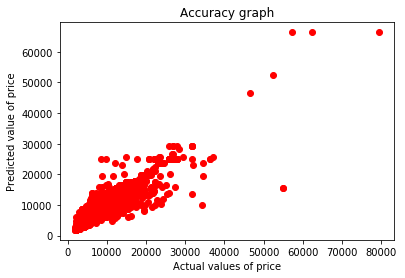

In [96]:
plt.scatter(y_train, y_train_pred, color='red', label='model predicted curve')
plt.title('Accuracy graph')
plt.xlabel('Actual values of price')
plt.ylabel('Predicted value of price')

### For Testing Data

In [97]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error : ", math.sqrt(mse(y_test, y_test_pred)))
print("Accuracy_score : ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error :  2144.889857211241
Accuracy_score :  0.7679795820401127


Text(0, 0.5, 'Predicted value of price')

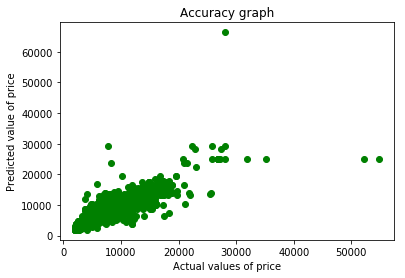

In [98]:
plt.scatter(y_test, y_test_pred, color='green', label='model predicted curve')
plt.title('Accuracy graph')
plt.xlabel('Actual values of price')
plt.ylabel('Predicted value of price')

### Loading Saved Model

In [99]:
trained_model = joblib.load('Trained_Models/Decision_Tree_model.pkl')
price = trained_model.predict([[5,6,6,3,2,2,9]])
print(price[0])

13669.31884057971
